In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [62]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [53]:
data = pd.read_excel('fluid_and_electrolyte_management_dataset.xlsx')
data.head()

,Age,Gender,Weight (kg),Height (cm),Sodium (Na+) (mEq/L),Potassium (K+) (mEq/L),Calcium (Ca2+) (mg/dL),Magnesium (Mg2+) (mg/dL),Chloride (Cl-) (mEq/L),Fluid Intake (mL),Sodium Status,Potassium Status,Calcium Status,Magnesium Status,Chloride Status
0,71,Female,60,170,142,4.231545,9.995592,1.519711,97,2002,Normal,Normal,Normal,Low,Low
1,34,Male,87,188,142,3.821879,9.569196,1.604109,106,2159,Normal,Normal,Normal,Low,Normal
2,80,Female,59,185,147,4.583502,9.076491,2.299916,106,3762,High,Normal,Normal,High,Normal
3,40,Male,47,182,149,3.600364,10.631602,1.678545,107,2780,High,Normal,High,Low,Normal
4,43,Male,46,179,137,3.189658,9.177335,2.152746,96,3143,Normal,Low,Normal,Normal,Low


In [55]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# One-hot encoding for electrolyte statuses
data = pd.get_dummies(data, columns=['Sodium Status', 'Potassium Status', 'Calcium Status', 'Magnesium Status', 'Chloride Status'])

# Scaling continuous variables like Age, Weight, Sodium, etc.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Weight (kg)', 'Height (cm)', 'Sodium (Na+) (mEq/L)', 
                                             'Potassium (K+) (mEq/L)', 'Calcium (Ca2+) (mg/dL)', 
                                             'Magnesium (Mg2+) (mg/dL)', 'Chloride (Cl-) (mEq/L)', 
                                             'Fluid Intake (mL)']])

# Add the scaled features back to the data
scaled_data = pd.DataFrame(scaled_features, columns=['Age', 'Weight (kg)', 'Height (cm)', 'Sodium (Na+) (mEq/L)', 
                                                      'Potassium (K+) (mEq/L)', 'Calcium (Ca2+) (mg/dL)', 
                                                      'Magnesium (Mg2+) (mg/dL)', 'Chloride (Cl-) (mEq/L)', 
                                                      'Fluid Intake (mL)'])

# Target variable - Let's say you want to predict Sodium Status
X = scaled_data
y = data[['Sodium Status_Low', 'Sodium Status_Normal', 'Sodium Status_High']]  # One-hot encoded labels

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Neural Network Model

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(3, activation='softmax'))  # Output layer for 3 classes (Low, Normal, High)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# 4. Evaluate the Model
accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy[1]*100:.2f}%")

# 5. Prediction
# Example: Predicting Sodium Status for new data
new_data = [[71, 60, 170, 142, 4.23, 9.99, 1.51, 97, 2002]]  # Sample new data point
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
predicted_class = prediction.argmax()  # This will give the class with the highest probability
print(f"Predicted Sodium Status: {['Low', 'Normal', 'High'][predicted_class]}")

Epoch 1/100
4/4 [==============================] - 1s 68ms/step - loss: 1.0617 - accuracy: 0.4500 - val_loss: 1.0830 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 1.0063 - accuracy: 0.5250 - val_loss: 1.0609 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9691 - accuracy: 0.5250 - val_loss: 1.0415 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9340 - accuracy: 0.5417 - val_loss: 1.0244 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9049 - accuracy: 0.5417 - val_loss: 1.0051 - val_accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 0.8764 - accuracy: 0.5917 - val_loss: 0.9848 - val_accuracy: 0.4000
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.8477 - accuracy: 0.6000 - val_loss: 0.9632 - val_accuracy: 0.4000
Epoch 8/100
4/4 [===

C:\Users\venka\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
Classification Report:
               precision    recall  f1-score   support

         Low       0.92      0.92      0.92        12
      Normal       0.82      0.90      0.86        10
        High       1.00      0.88      0.93         8

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



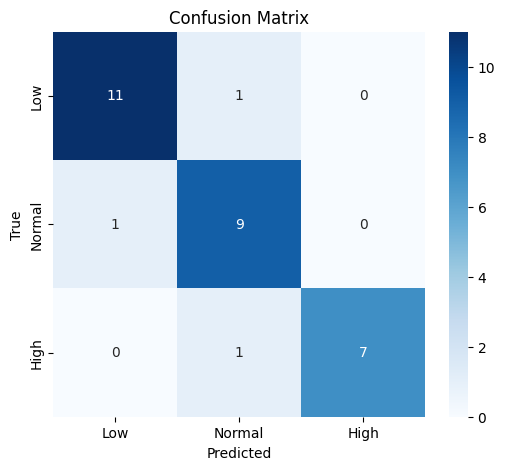

Accuracy: 90.00%


In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions to class labels (argmax to get the index of the maximum probability)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test.values, axis=1)  # Convert one-hot encoded labels to single class labels

# 2. Classification Report (Precision, Recall, F1-Score)
report = classification_report(y_test_labels, y_pred_labels, target_names=['Low', 'Normal', 'High'])
print("Classification Report:\n", report)

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Normal', 'High'], 
            yticklabels=['Low', 'Normal', 'High'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 4. Calculate and print Accuracy
accuracy = np.sum(y_pred_labels == y_test_labels) / len(y_test_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")


In [64]:
def generate_report(predictions):
    statuses = ['Low', 'Normal', 'High']
    report = f"Fluid and Electrolyte Report:\n"
    report += f"Sodium Status: {statuses[predictions['Sodium']]} \n"
    report += f"Potassium Status: {statuses[predictions['Potassium']]} \n"
    report += f"Calcium Status: {statuses[predictions['Calcium']]} \n"
    report += f"Magnesium Status: {statuses[predictions['Magnesium']]} \n"
    report += f"Chloride Status: {statuses[predictions['Chloride']]}"
    return report

# Example report generation for a new patient
new_predictions = {
    'Sodium': 0,  # Low
    'Potassium': 1,  # Normal
    'Calcium': 2,  # High
    'Magnesium': 0,  # Low
    'Chloride': 1  # Normal
}

print(generate_report(new_predictions))


Fluid and Electrolyte Report:
Sodium Status: Low 
Potassium Status: Normal 
Calcium Status: High 
Magnesium Status: Low 
Chloride Status: Normal


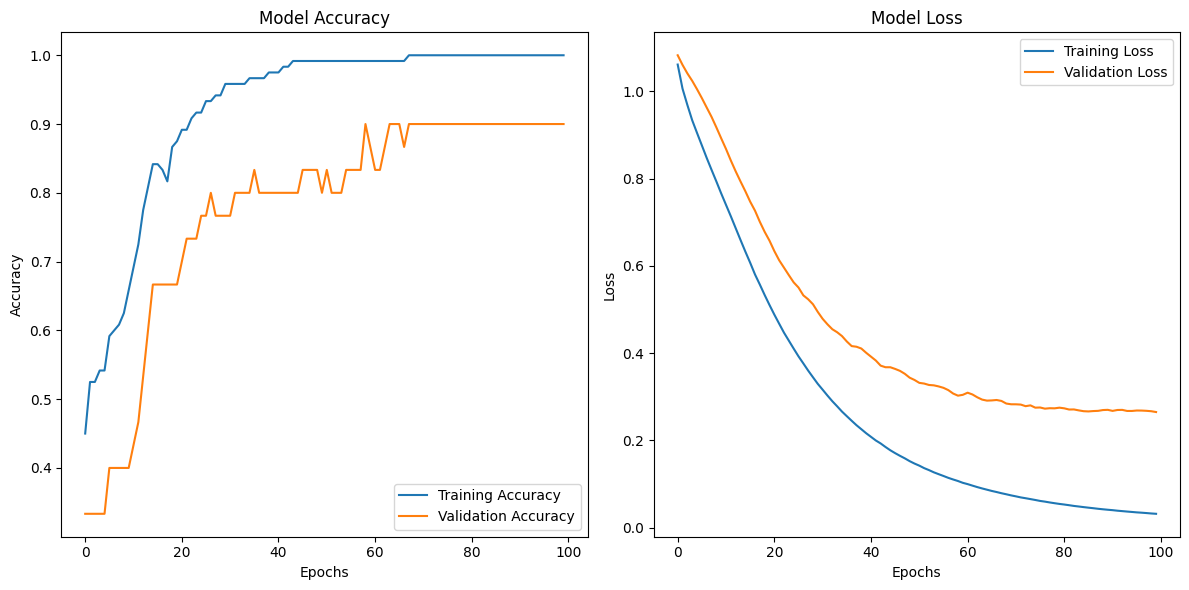

In [65]:
import matplotlib.pyplot as plt

# Plotting the training & validation accuracy
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()
